# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [12]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [6]:
torch.cuda.is_available()

False

In [13]:
DATA_PATH = '/Actividad2'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [14]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Actividad2
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [15]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

tensor([[[[-1.9720e+00, -1.9720e+00, -1.9561e+00,  ..., -1.9879e+00,
           -1.9402e+00, -1.8291e+00],
          [-1.9879e+00, -1.9720e+00, -1.9561e+00,  ..., -1.8767e+00,
           -1.8767e+00, -1.7973e+00],
          [-1.5274e+00, -1.3687e+00, -1.3687e+00,  ..., -8.6060e-01,
           -8.9236e-01, -9.2411e-01],
          ...,
          [ 9.2006e-02,  1.3964e-01,  2.5077e-01,  ...,  8.5409e-01,
            8.3822e-01,  7.9059e-01],
          [ 1.8727e-01,  2.5077e-01,  3.4603e-01,  ...,  9.4935e-01,
            9.3348e-01,  8.8585e-01],
          [ 2.6665e-01,  3.1428e-01,  4.4130e-01,  ...,  1.0764e+00,
            1.0287e+00,  9.8111e-01]],

         [[-1.9674e+00, -1.9674e+00, -1.9513e+00,  ..., -1.9513e+00,
           -1.9028e+00, -1.7899e+00],
          [-1.9835e+00, -1.9674e+00, -1.9513e+00,  ..., -1.8544e+00,
           -1.8544e+00, -1.7737e+00],
          [-1.5317e+00, -1.3703e+00, -1.3703e+00,  ..., -8.3773e-01,
           -8.7001e-01, -9.0228e-01],
          ...,
     

### Using  GPUs

In [17]:

    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: ship


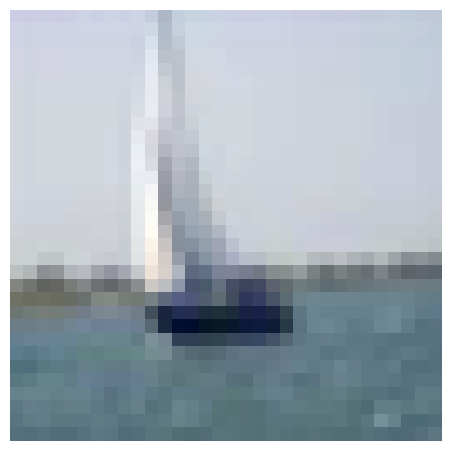

In [18]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


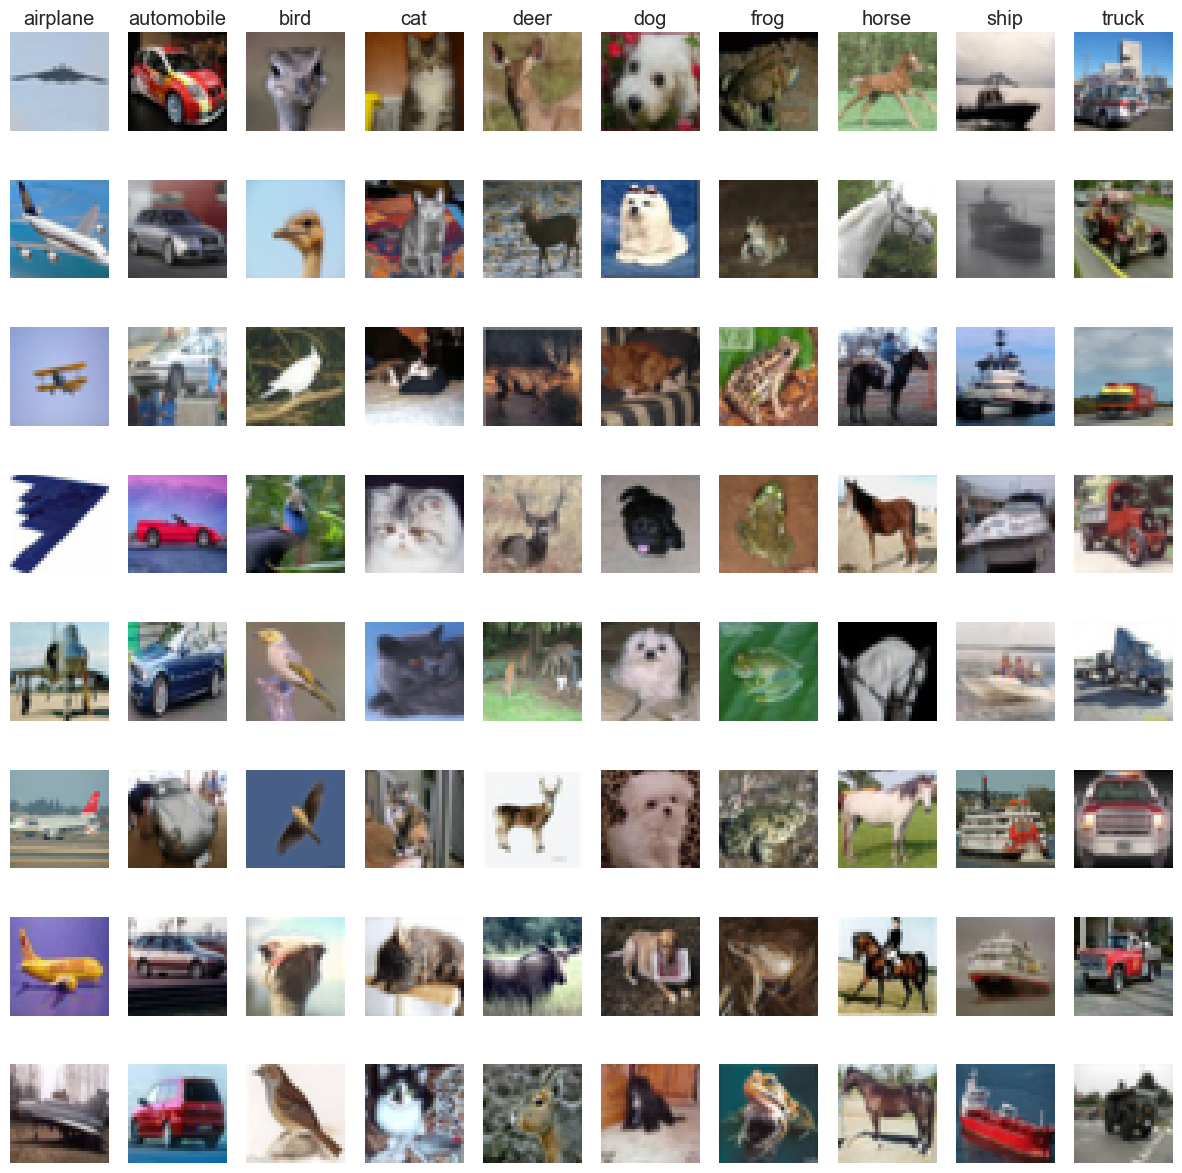

In [19]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

### Calcular accuracy


In [24]:
def accuracy(model, loader, device='cpu'):
    num_correct = 0
    num_total = 0
    
    # Set the model to evaluation mode
    model.eval()  
    model = model.to(device=device)  # Send the model to the device (CPU/GPU)

    # We don't need to track gradients in evaluation mode
    with torch.no_grad():  
        for xi, yi in loader:
            # Move inputs and labels to the device (CPU/GPU)
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Forward pass: Compute the model's predictions (scores)
            scores = model(xi)
            
            # Get the predicted class (with highest score)
            _, pred = scores.max(dim=1)  

            # Count correct predictions
            num_correct += (pred == yi).sum().item()  # Use .item() to convert tensor to a scalar
            num_total += pred.size(0)  # Total number of samples

    # Return the accuracy as a percentage
    return float(num_correct) / num_total if num_total > 0 else 0.0

### Loop de entrenamiento

In [33]:
import torch
import torch.nn.functional as F

def train(model, optimiser, train_loader, val_loader, epochs, device='cpu'):
    # Enviar el modelo al dispositivo (GPU o CPU)
    model = model.to(device=device)
    
    for epoch in range(epochs):
        model.train()  # Asegura que el modelo esté en modo entrenamiento
        
        running_loss = 0.0  # Para llevar un registro del costo por época
        
        for i, (xi, yi) in enumerate(train_loader):
            # Mover los datos (entradas y etiquetas) al dispositivo
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            
            # Forward pass: Obtener predicciones
            scores = model(xi)
            
            # Calcular el costo utilizando cross_entropy
            cost = F.cross_entropy(scores, yi)
            
            # Limpiar los gradientes previos
            optimiser.zero_grad()
            
            # Backward pass: Calcular gradientes
            cost.backward()
            
            # Actualizar los parámetros
            optimiser.step()
            
            # Acumular el costo total
            running_loss += cost.item()

        # Calcular la precisión en el conjunto de validación después de cada época
        acc = accuracy(model, val_loader, device=device)
        
        # Imprimir resultados por época
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Validation Accuracy: {acc:.2%}')


### Linear model

In [34]:
# To do: Use PyTorch to create a linear model to have an initial baseline model
hidden1 = 256 
hidden = 256
lr = 0.001
epochs = 10
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [35]:
train(model1, optimiser, train_loader, val_loader, epochs, device=device)

Epoch [1/10], Loss: 1286.2214, Validation Accuracy: 46.54%
Epoch [2/10], Loss: 1130.6756, Validation Accuracy: 50.08%
Epoch [3/10], Loss: 1048.9384, Validation Accuracy: 51.94%
Epoch [4/10], Loss: 985.0162, Validation Accuracy: 51.68%
Epoch [5/10], Loss: 932.1898, Validation Accuracy: 50.74%
Epoch [6/10], Loss: 879.2848, Validation Accuracy: 52.96%
Epoch [7/10], Loss: 831.2531, Validation Accuracy: 53.02%
Epoch [8/10], Loss: 784.5143, Validation Accuracy: 52.28%
Epoch [9/10], Loss: 743.8238, Validation Accuracy: 53.50%
Epoch [10/10], Loss: 700.5205, Validation Accuracy: 53.26%


### Sequential CNN

In [37]:
channel1 = 16
channel2 = 32
epochs = 10
lr = 0.0001
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1, 
                                   kernel_size=3, padding=1),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= 3, padding=1),
                          nn.ReLU(),
                          nn.MaxPool2d(2, 2),
                          nn.Flatten(),
                          nn.Linear(in_features=16*16*channel2, out_features=10)                        
                                   )
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
train(modelCNN1, optimiser, train_loader, val_loader, epochs, device=device)

Epoch [1/10], Loss: 1355.1646, Validation Accuracy: 47.58%
Epoch [2/10], Loss: 1086.9837, Validation Accuracy: 54.68%
Epoch [3/10], Loss: 986.6487, Validation Accuracy: 57.48%
Epoch [4/10], Loss: 933.2899, Validation Accuracy: 58.40%
Epoch [5/10], Loss: 894.0172, Validation Accuracy: 59.34%
Epoch [6/10], Loss: 861.9100, Validation Accuracy: 60.52%
Epoch [7/10], Loss: 834.4581, Validation Accuracy: 61.86%
